In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.shape

(53940, 10)

In [4]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

## Misisng Values

In [5]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>0.1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 4),  ' % missing values')

## Value Counts

In [6]:
for col in df.columns:
    print(col, df[col].value_counts())

carat 0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.11       1
3.50       1
3.67       1
5.01       1
3.51       1
Name: carat, Length: 273, dtype: int64
cut Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
color G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
clarity SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
depth 62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
52.2       1
71.2       1
72.9       1
53.1       1
53.0       1
Name: depth, Length: 184, dtype: int64
table 56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
        ... 
64.2       1
79.0       1
64.3       1
63.3       1
65.4       1
Name: table, Length: 127, dtype: int64
price 605      132
802      127
625      126
828      12

## nunique

In [7]:
for col in df.columns:
    print(col,'--', df[col].nunique())

carat -- 273
cut -- 5
color -- 7
clarity -- 8
depth -- 184
table -- 127
price -- 11602
x -- 554
y -- 552
z -- 375


## Describe

In [8]:
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

## Info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## Drop Duplicates Values

In [10]:
df[df.duplicated()].shape

(146, 10)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(53794, 10)

## Numeical Columns

In [13]:
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
numeric_cols

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

## Categorical Columns

In [14]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
categorical_cols

['cut', 'color', 'clarity']

## Probability Distribution of numerical columns

In [15]:
def prob_num(df):
    for i in df.select_dtypes(include=['int64','float64']).columns:
        print(i, df[i].value_counts(normalize=True))
prob_num(df)

carat 0.30    0.048258
1.01    0.041640
0.31    0.041603
0.70    0.036826
0.32    0.033963
          ...   
2.77    0.000019
3.11    0.000019
5.01    0.000019
3.67    0.000019
3.65    0.000019
Name: carat, Length: 273, dtype: float64
depth 62.0    0.041510
61.9    0.040153
61.8    0.038462
62.2    0.037792
62.1    0.037383
          ...   
54.3    0.000019
72.2    0.000019
54.4    0.000019
54.0    0.000019
53.0    0.000019
Name: depth, Length: 184, dtype: float64
table 56.0    0.183125
57.0    0.180225
58.0    0.155259
59.0    0.121984
55.0    0.116035
          ...   
64.2    0.000019
79.0    0.000019
64.3    0.000019
63.3    0.000019
65.4    0.000019
Name: table, Length: 127, dtype: float64
price 605      0.002454
802      0.002342
625      0.002324
828      0.002305
776      0.002305
           ...   
15122    0.000019
17149    0.000019
6118     0.000019
6902     0.000019
8465     0.000019
Name: price, Length: 11602, dtype: float64
x 4.37     0.008254
4.34     0.008105
4.33     0.00

## Frequency Distribution of numerical columns

In [16]:
def plot_num_var(df):
    plot = df.select_dtypes(include=['int64','float64']).columns
    for i in plot:
        plt.figure(figsize=(14,8))
        plt.hist(df[i], bins=20)
        plt.title(i)
        plt.show()

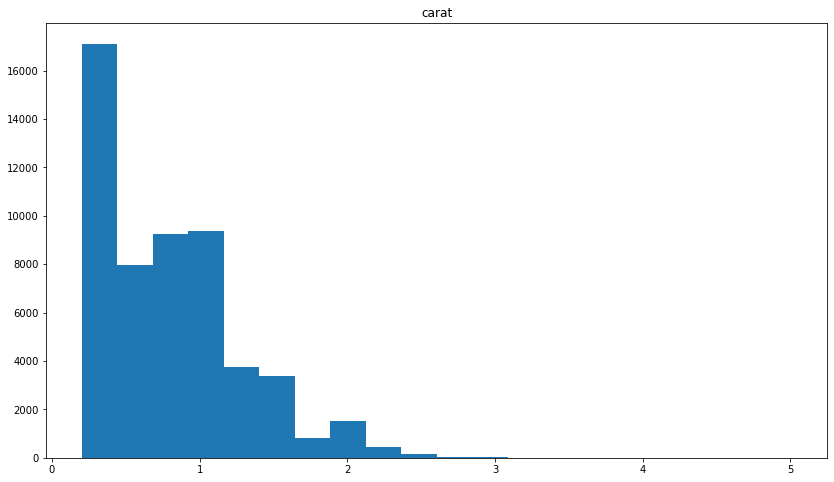

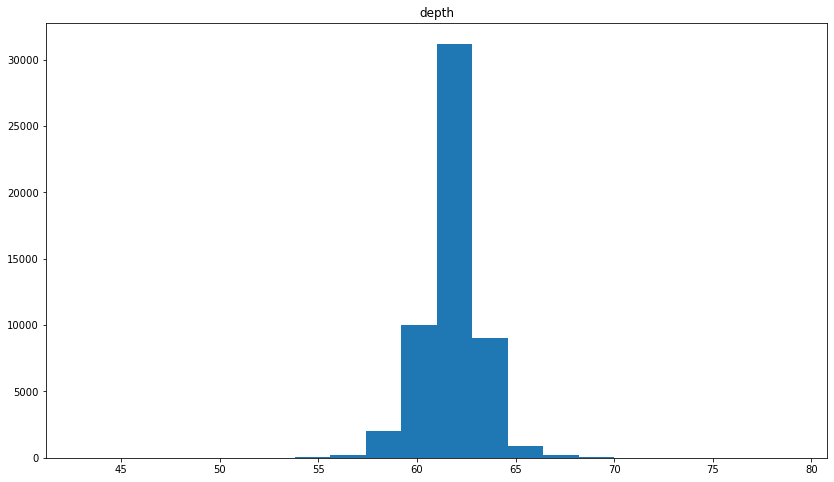

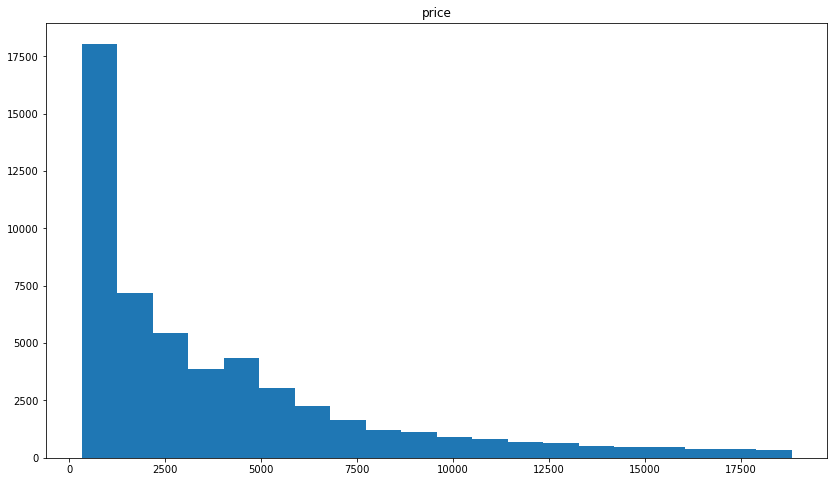

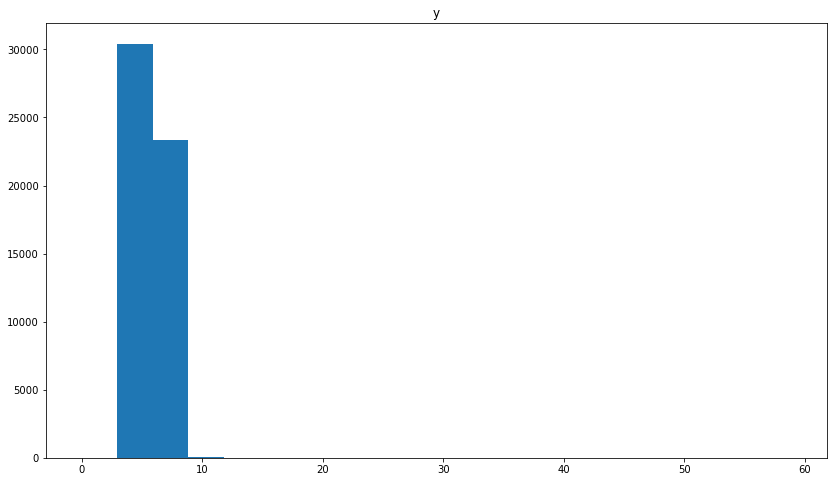

In [17]:
plot_num_var(df)

## Frequency Distribution of Categorical Columns

In [18]:
def plot_cat_var(df):
    plot = df.select_dtypes(include=['object']).columns
    for i in plot:
        plt.figure(figsize=(14,8))
        # plt.xticks(rotation=90)
        plt.hist(df[i], bins=20)
        plt.title(i)
        plt.show()

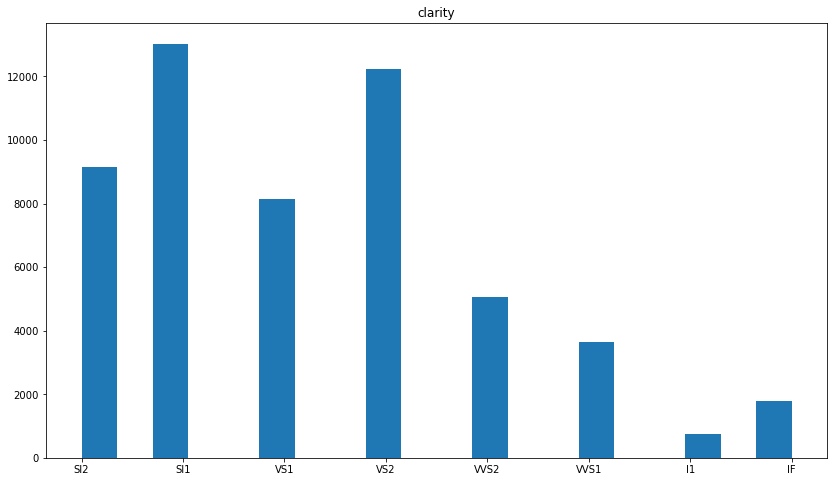

In [19]:
plot_cat_var(df)

## Skewness

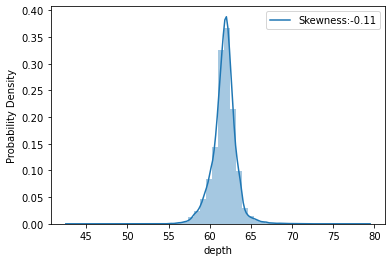

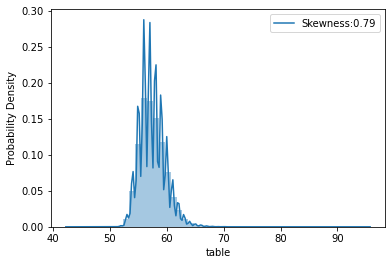

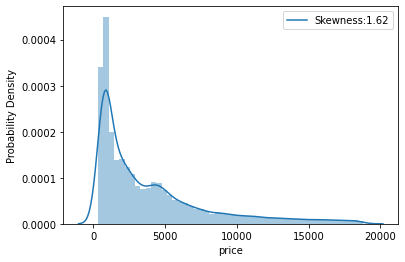

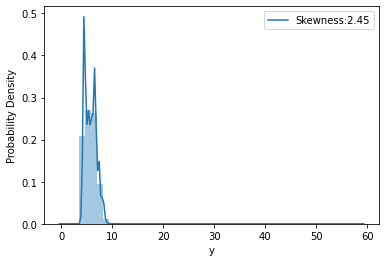

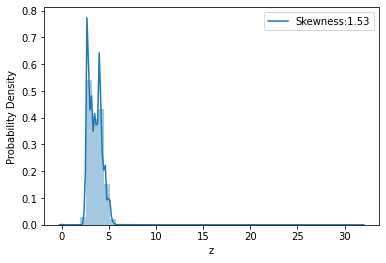

In [20]:
for col in numeric_cols:
    bar = sns.distplot(df[col], label=col)
    bar.legend(['Skewness:{:0.2f}'.format(df[col].skew())])
    plt.ylabel('Probability Density')
    plt.xlabel(col)
    plt.show()

## Number of outliers using IQR method

In [21]:
def check_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    print(f'{col} outliers: {df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]}')
    print(f'Lower bound: {lower_bound}')
    print(f'Upper bound: {upper_bound}')
    

check_outliers(df, 'carat')
check_outliers(df, 'depth')
check_outliers(df, 'table')
check_outliers(df, 'price')
check_outliers(df, 'x')
check_outliers(df, 'y')
check_outliers(df, 'z')



carat outliers: 1873
Lower bound: -0.5599999999999999
Upper bound: 2.0
depth outliers: 2525
Lower bound: 58.75
Upper bound: 64.75
table outliers: 604
Lower bound: 51.5
Upper bound: 63.5
price outliers: 3523
Lower bound: -5612.625
Upper bound: 11890.375
x outliers: 31
Lower bound: 1.9649999999999999
Upper bound: 9.285
y outliers: 28
Lower bound: 1.9899999999999993
Upper bound: 9.27
z outliers: 48
Lower bound: 1.23
Upper bound: 5.710000000000001


## Boxplot of Outliers

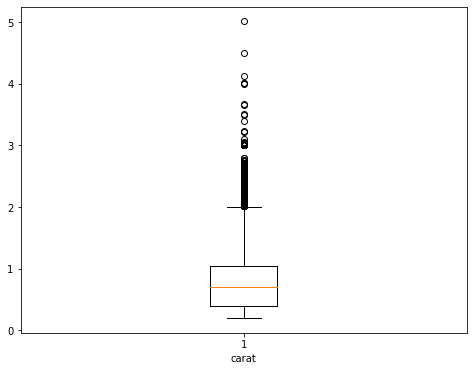

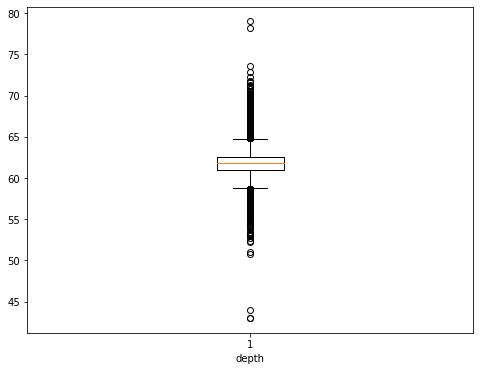

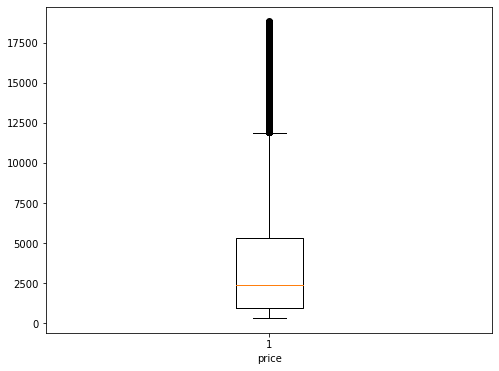

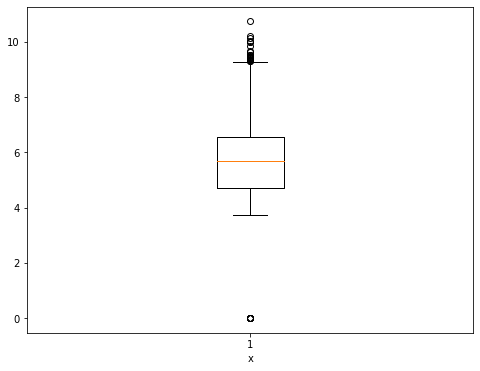

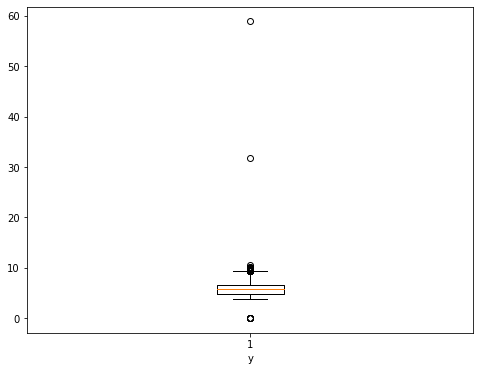

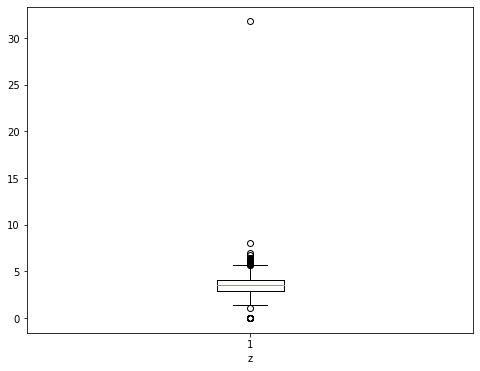

In [22]:
def check_outliers_boxplot(df, col):
    plt.figure(figsize=(8,6))
    plt.xlabel(col)
    plt.boxplot(df[col])
    plt.show()

check_outliers_boxplot(df, 'carat')
check_outliers_boxplot(df, 'depth')
check_outliers_boxplot(df, 'table')
check_outliers_boxplot(df, 'price')
check_outliers_boxplot(df, 'x')
check_outliers_boxplot(df, 'y')
check_outliers_boxplot(df, 'z')

In [29]:
df.corr()

carat     depth     table     price         x         y         z
carat  1.000000  0.027861  0.181091  0.921548  0.975380  0.951908  0.953542
depth  0.027861  1.000000 -0.297669 -0.011048 -0.025348 -0.029389  0.094757
table  0.181091 -0.297669  1.000000  0.126566  0.194855  0.183231  0.150270
price  0.921548 -0.011048  0.126566  1.000000  0.884504  0.865395  0.861208
x      0.975380 -0.025348  0.194855  0.884504  1.000000  0.974592  0.970686
y      0.951908 -0.029389  0.183231  0.865395  0.974592  1.000000  0.951844
z      0.953542  0.094757  0.150270  0.861208  0.970686  0.951844  1.000000

In [30]:
sns.pairplot(df , diag_kind = 'kde');

In [31]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True ,cmap=plt.cm.CMRmap_r);

In [32]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]

## Normalising the Data

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
numerical = df.select_dtypes(include=['int64', 'float64'])   
df_numerical = pd.DataFrame(scaler.fit_transform(numerical),columns = numerical.columns)
df_numerical.head()

carat     depth     table     price         x         y         z
0  0.006237  0.469298  0.333333  0.000000  0.031384  0.043732  0.075203
1  0.002079  0.394737  0.500000  0.000000  0.022825  0.023324  0.050813
2  0.006237  0.267544  0.611111  0.000054  0.045649  0.056851  0.050813
3  0.018711  0.508772  0.416667  0.000433  0.067047  0.080175  0.115854
4  0.022869  0.548246  0.416667  0.000487  0.087019  0.097668  0.140244

In [36]:
# One Hot Encoding the categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

In [37]:
categorical = df.select_dtypes('object')
df_categorical = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names(categorical.columns))
df_categorical.head()

cut_Good  cut_Ideal  cut_Premium  cut_Very Good  color_E  color_F  color_G  \
0       0.0        1.0          0.0            0.0      1.0      0.0      0.0   
1       0.0        0.0          1.0            0.0      1.0      0.0      0.0   
2       1.0        0.0          0.0            0.0      1.0      0.0      0.0   
3       0.0        0.0          1.0            0.0      0.0      0.0      0.0   
4       1.0        0.0          0.0            0.0      0.0      0.0      0.0   

   color_H  color_I  color_J  clarity_IF  clarity_SI1  clarity_SI2  \
0      0.0      0.0      0.0         0.0          0.0          1.0   
1      0.0      0.0      0.0         0.0          1.0          0.0   
2      0.0      0.0      0.0         0.0          0.0          0.0   
3      0.0      1.0      0.0         0.0          0.0          0.0   
4      0.0      0.0      1.0         0.0          0.0          1.0   

   clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0          0.0          0.0           0.0           0.0  
1          0.0          0.0           0.0           0.0  
2          1.0          0.0           0.0           0.0  
3          0.0          1.0           0.0           0.0  
4          0.0          0.0           0.0           0.0

In [38]:
#Final dataset 
final_df = pd.concat([df_numerical,df_categorical], axis = 1)
final_df.head()

carat     depth     table     price         x         y         z  \
0  0.006237  0.469298  0.333333  0.000000  0.031384  0.043732  0.075203   
1  0.002079  0.394737  0.500000  0.000000  0.022825  0.023324  0.050813   
2  0.006237  0.267544  0.611111  0.000054  0.045649  0.056851  0.050813   
3  0.018711  0.508772  0.416667  0.000433  0.067047  0.080175  0.115854   
4  0.022869  0.548246  0.416667  0.000487  0.087019  0.097668  0.140244   

   cut_Good  cut_Ideal  cut_Premium  ...  color_H  color_I  color_J  \
0       0.0        1.0          0.0  ...      0.0      0.0      0.0   
1       0.0        0.0          1.0  ...      0.0      0.0      0.0   
2       1.0        0.0          0.0  ...      0.0      0.0      0.0   
3       0.0        0.0          1.0  ...      0.0      1.0      0.0   
4       1.0        0.0          0.0  ...      0.0      0.0      1.0   

   clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0         0.0          0.0          1.0          0.0          0.0   
1         0.0          1.0          0.0          0.0          0.0   
2         0.0          0.0          0.0          1.0          0.0   
3         0.0          0.0          0.0          0.0          1.0   
4         0.0          0.0          1.0          0.0          0.0   

   clarity_VVS1  clarity_VVS2  
0           0.0           0.0  
1           0.0           0.0  
2           0.0           0.0  
3           0.0           0.0  
4           0.0           0.0  

[5 rows x 24 columns]

In [40]:
# Splitting the columns into X and Y
X= final_df.drop(["price"],axis =1)
Y= final_df["price"]

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

## Building KNN Algorithm from scratch

In [42]:
class KNN_Reg:
    def __init__(self,K):
        self.K=K
        
    def fit(self,X,Y):
        self.X=np.asarray(X)
        self.Y=np.asarray(Y)
        
    def predict(self,X):
        X=np.asarray(X)
        result=[]
        for x in X:
            dis=np.sqrt(np.sum((x-self.X)**2,axis=1))
            index=dis.argsort()
            index=index[:self.K]
            result.append(np.mean(self.Y[index]))
        return np.array(result)

In [43]:
Model_Scrach=KNN_Reg(K=3)
Model_Scrach.fit(X_train,Y_train)
y_pred_sc=Model_Scrach.predict(X_test)

## Sklearn KNN Model

In [44]:
from sklearn.neighbors import KNeighborsRegressor
Model_KNN = KNeighborsRegressor( n_neighbors = 3 )
Model_KNN.fit( X_train, Y_train )
Y_pred_builtin =  Model_KNN.predict( X_test )

## Comparing the Result

In [45]:
print( "Predicted values by our model     :  ", np.round( y_pred_sc[:3], 2 ) )       
print( "Predicted values by sklearn model :  ", np.round( Y_pred_builtin[:3], 2 ) )

Predicted values by our model     :   [0.32 0.03 0.86]
Predicted values by sklearn model :   [0.32 0.03 0.86]
